In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C:/Users/Pritam Laskar/Documents/PGCM - DA/Term II/Term II Study Materials/203 Time Series/Case 01 Tractor Sales/ML+02+Time+Series+Dataset+1.csv")

In [3]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.shape

(144, 2)

In [6]:
df.dtypes

Month-Year                object
Number of Tractor Sold     int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
(df.isnull().sum()/len(df)*100)

Month-Year                0.0
Number of Tractor Sold    0.0
dtype: float64

In [9]:
# Rename columns

df.columns = ['Date', 'TractorSold']

In [10]:
# Create a range for dates

dates = pd.date_range(start = '2003-01-01', freq = 'MS', periods = len(df))
dates

# Frequency = MS means monthly / month wise

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [11]:
# Applying dates into date

df['Date'] = dates
df['Date']

0     2003-01-01
1     2003-02-01
2     2003-03-01
3     2003-04-01
4     2003-05-01
         ...    
139   2014-08-01
140   2014-09-01
141   2014-10-01
142   2014-11-01
143   2014-12-01
Name: Date, Length: 144, dtype: datetime64[ns]

In [12]:
df.dtypes

Date           datetime64[ns]
TractorSold             int64
dtype: object

In [13]:
df.describe()

,TractorSold
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [14]:
df.set_index(['Date'], inplace = True)

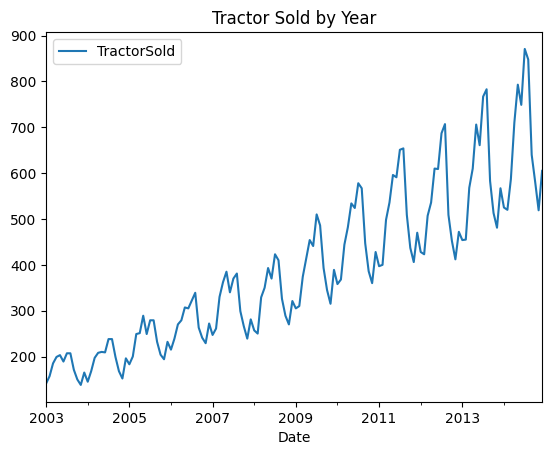

In [15]:
df.plot();
plt.title('Tractor Sold by Year');

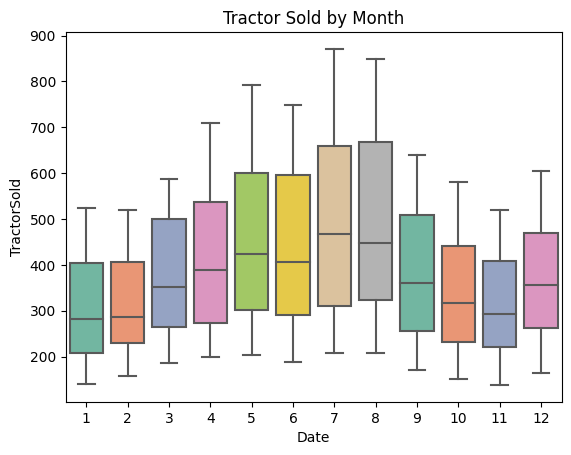

In [16]:
sns.boxplot(x = df['TractorSold'].index.month, y = df['TractorSold'], palette = 'Set2');
plt.title('Tractor Sold by Month');

# Decomposing


In [17]:
# # Decomposing - Multiplicative 

# sm.tsa.seasonal_decompose(df, model = 'multiplicative').plot()
# plt.show()

In [18]:
# # Decomposing - Additive 

# sm.tsa.seasonal_decompose(df, model = 'additive').plot()
# plt.title('Decompose - Additive')
# plt.show()

When to choose multiplicative or additive?

- Trend: Linear (additive); exponentially increasing (multiplicative)
- Seasonality:  Constant over time period (additive); not constant (multiplicative)
- Residual: Constant (choose model where it is constant irrespective of additive or multiplicative)



# Stationary

We can check stationary by following methods:

- Rolling Statistics: By plotting rolling mean and rolling standard deviation. If our rolling stats are not constant, it means our time series is not stationary.

- ACF / PACF : If the time series is stationary, the ACF/PACF will show a quick drop-off in correlation after a small amount of lag between points.

- Augmented Dickey-Fuller Test: A statistical test for checking stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary

In [19]:
# Augmented Dickey Fuller Test

def stationary(timeseries):
    # Determing rolling stats
    rollmean = timeseries.rolling(window = 12).mean()
    rollstd = timeseries.rolling(window = 12).std()

    # Ploting rolling stats
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    rolling_mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
    rolling_std = plt.plot(rollstd, color = 'black', label = 'Rolling Standard Deviation')
    plt.title('Rolling Stats with Augmented Dickey Fuller Test')
    plt.legend()
    plt.show()
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

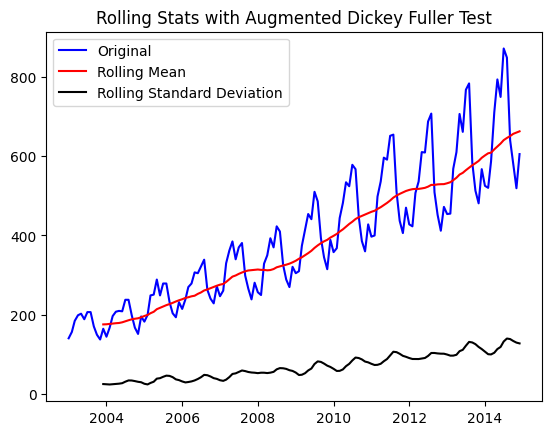

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [20]:
stationary(df['TractorSold'])

As P-Value (0.99) > Critical Value (5%) (-2.88), given time series is not stationary

In [21]:
# # ACF / PACF

# fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,7))

# # Subplot 1: Autocorrelation (ACF)
# plot_acf(df.TractorSold, lags = 30, ax=axes[0])

# # Subplot 2: Partia Autocorrelation (PACF)
# plot_pacf(df.TractorSold, lags = 30, ax=axes[1])

# plt.show()

# Converting Non-Stationary into Stationary

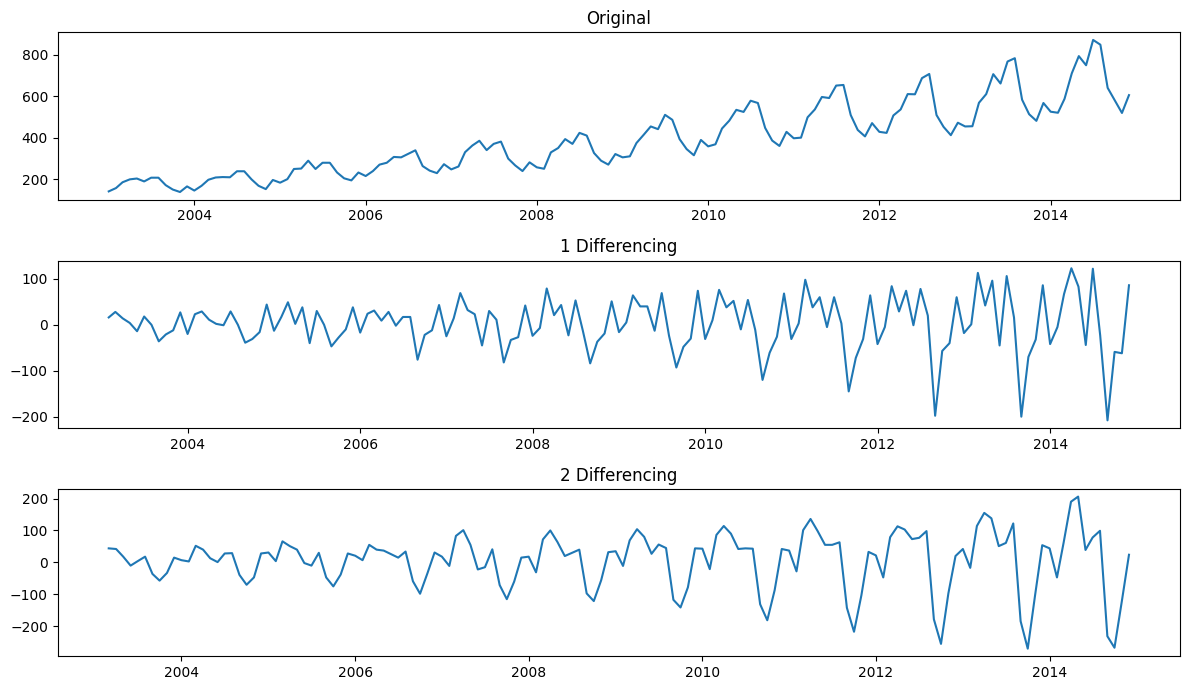

In [22]:
# Differencing is used to remove trend

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12,7))

# Subplot 1: 
axes[0].plot(df.index, df['TractorSold'])
axes[0].set_xlabel('');
axes[0].set_ylabel('');
axes[0].set_title('Original');

# Subplot 2:
axes[1].plot(df.index, df['TractorSold'].diff(periods = 1))
axes[1].set_xlabel('');
axes[1].set_ylabel('');
axes[1].set_title('1 Differencing');

# Subplot 3:
axes[2].plot(df.index, df['TractorSold'].diff(periods = 2))
axes[2].set_xlabel('');
axes[2].set_ylabel('');
axes[2].set_title('2 Differencing');

plt.tight_layout()
plt.show()


ARIMA (0,1,0) has removed trend.

# Making Variance Constant through Log Transformation

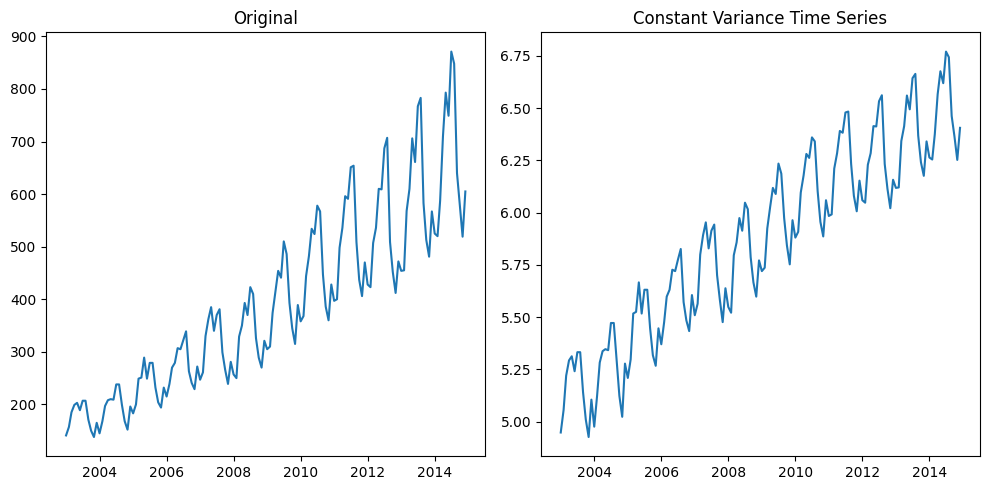

In [23]:
# Making variance constant using Log Transformation

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

# Subplot 1: Original
axes[0].plot(df)
axes[0].set_xlabel('');
axes[0].set_ylabel('');
axes[0].set_title('Original');

# Subplot 2: Log Transformation
df_log = np.log(df)
axes[1].plot(df_log)
axes[1].set_xlabel('');
axes[1].set_ylabel('');
axes[1].set_title('Constant Variance Time Series');

plt.tight_layout()
plt.show()

# Difference log transformation to make time series stationary on both mean and variance


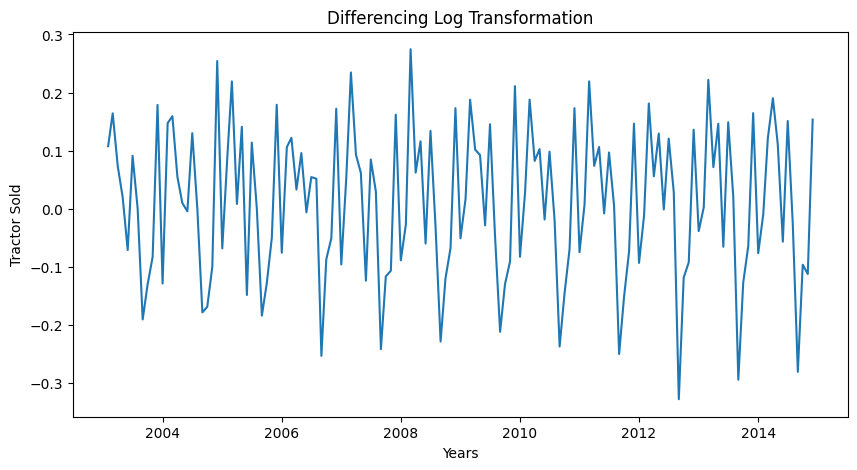

In [24]:
plt.figure(figsize = (10,5))
df_log_diff = np.log(df).diff(periods = 1)
plt.plot(df_log_diff)
plt.xlabel('Years');
plt.ylabel('Tractor Sold');
plt.title('Differencing Log Transformation');

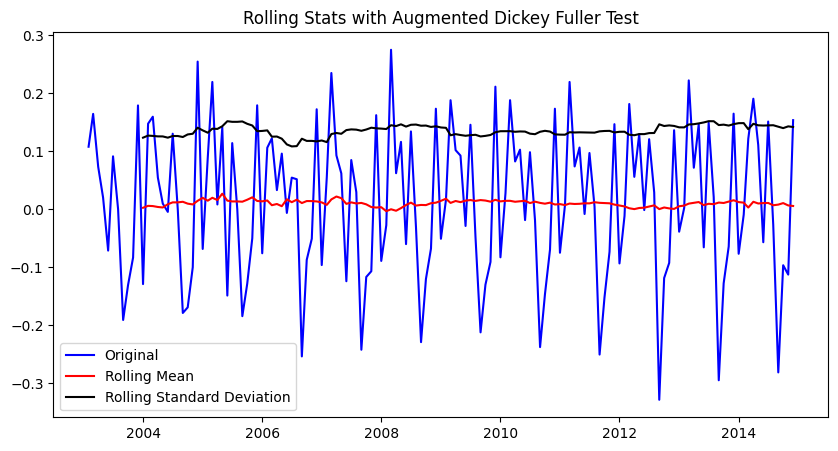

Results of Dickey-Fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [25]:
plt.figure(figsize = (10,5))
df_log_diff.dropna(inplace = True)
stationary(df_log_diff)

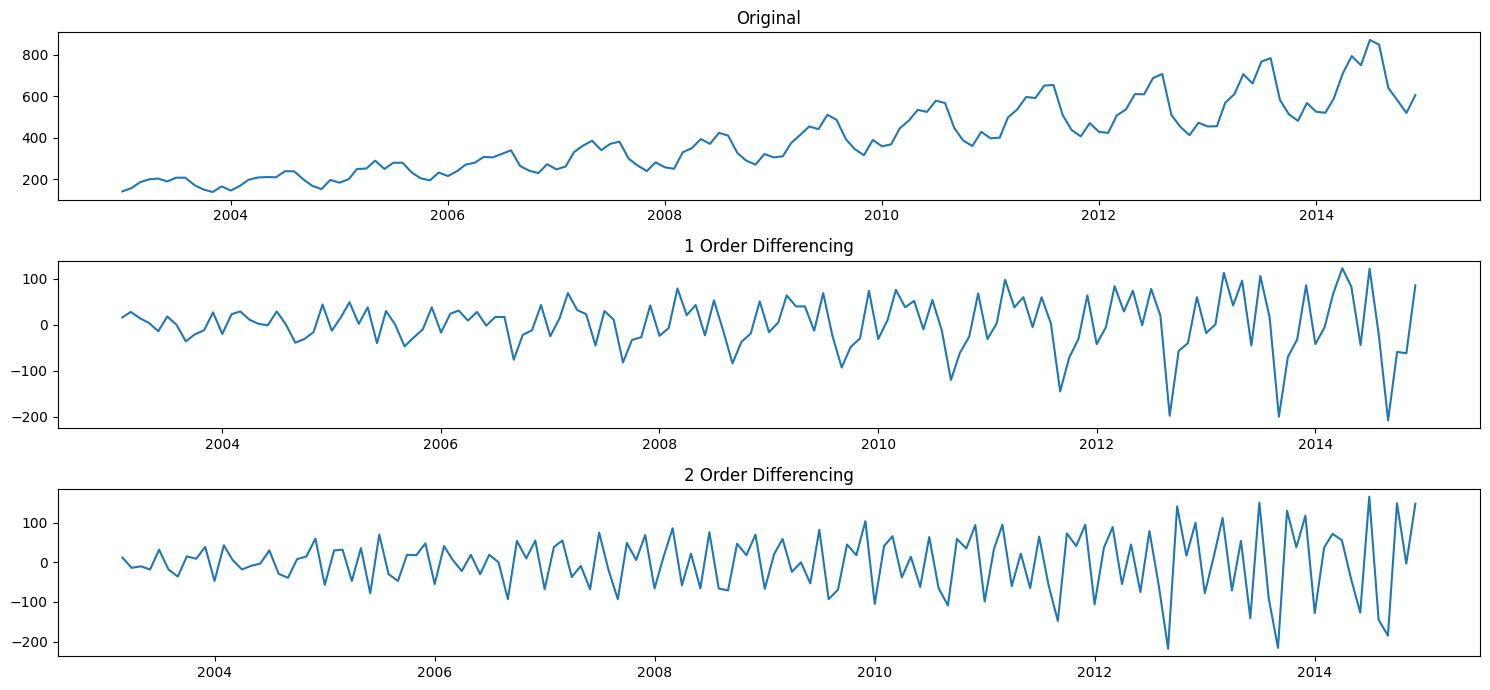

In [26]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,7))

# Subplot 1: Original
axes[0].plot(df)
axes[0].set_title('Original');

# Subplot 2: 1 Differencing
axes[1].plot(df.diff())
axes[1].set_title('1 Order Differencing');

# Subplot 3: 2 Order Differencing
axes[2].plot(df.diff().diff())
axes[2].set_title('2 Order Differencing');

plt.tight_layout()
plt.show()

we can see how the time series has become stationary. One thing which is noticeable here is in first-order differencing we have fewer noises in the data while after 1st order there is an increase in the noise. So we can select 1st order differencing for our model. We can also verify this using an autocorrelation plot.

# Checking stationarity of residuals

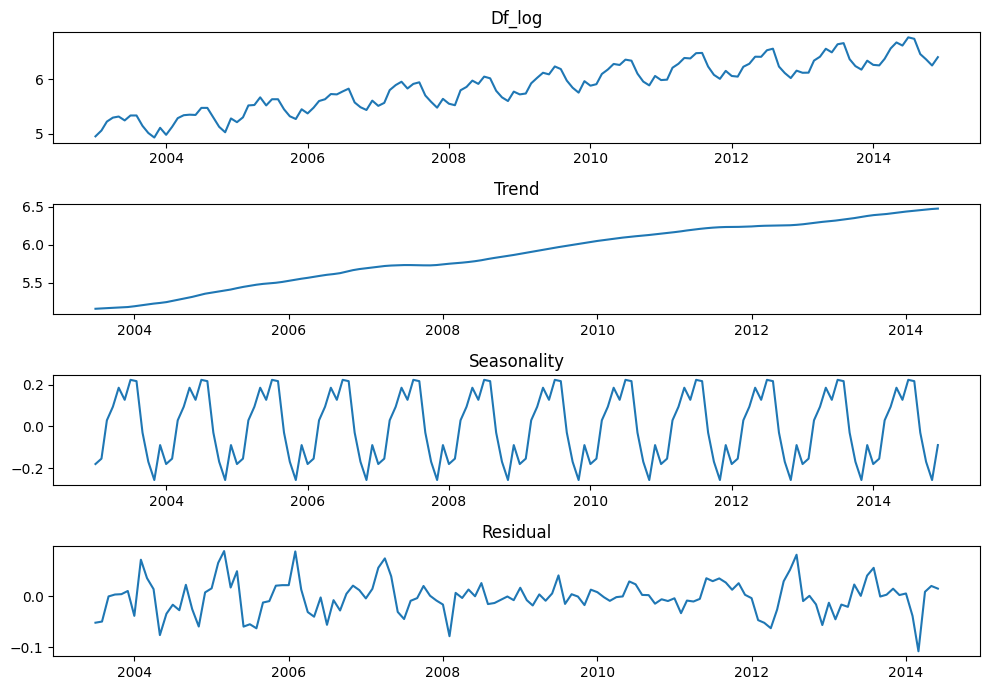

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10,7))

# Subplot 1: Df_log
axes[0].plot(df_log)
axes[0].set_title('Df_log');

# Subplot 2: Trend
axes[1].plot(trend)
axes[1].set_title('Trend');

# Subplot 3: Seasonal
axes[2].plot(seasonal)
axes[2].set_title('Seasonality');

# Subplot 4: Residual
axes[3].plot(residual)
axes[3].set_title('Residual');

plt.tight_layout()
plt.show()

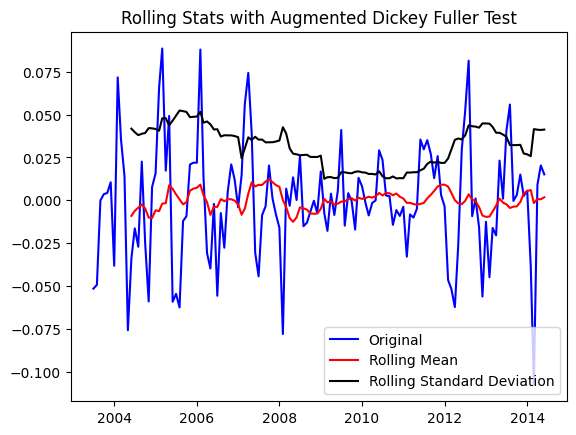

Results of Dickey-Fuller Test:
Test Statistic                -6.330971e+00
p-value                        2.907010e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [28]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
stationary(ts_log_decompose)

As P value < Critical Value (5%), our timeseries is now stationary

# Time Series Forecasting

### ACF and PACF to identify potential AR and MA Model

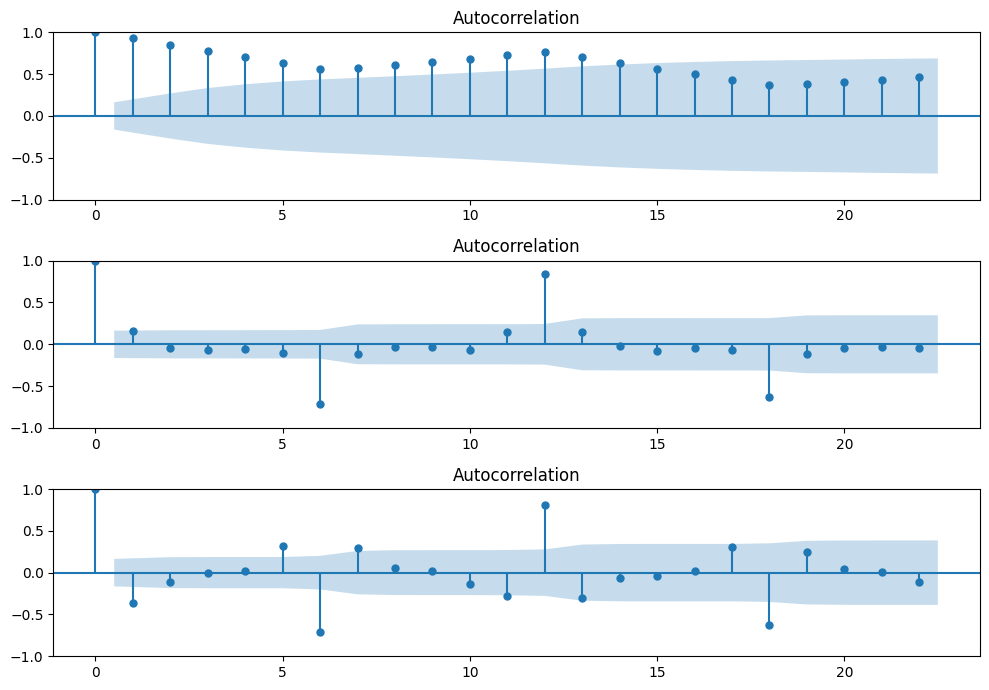

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,7))

# Subplot 1: Original
plot_acf(df.TractorSold, ax=axes[0])

# Subplot 2: 1 Differencing
plot_acf(df.TractorSold.diff().dropna(), ax=axes[1])

# Subplot 3: 3 Differencing
plot_acf(df.TractorSold.diff().diff().dropna(), ax=axes[2])

plt.tight_layout()
plt.show()

Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference. Thus MA = 1 or 2 (from 1 differencing).

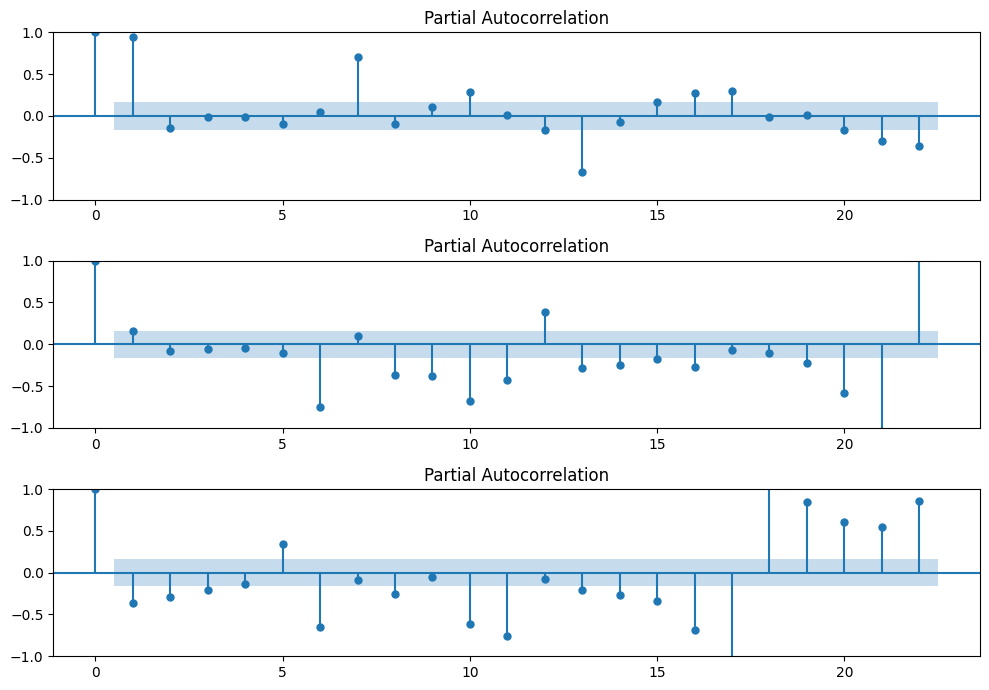

In [30]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,7))

# Subplot 1: Original
plot_pacf(df.TractorSold, ax=axes[0])

# Subplot 2: 1 Differencing
plot_pacf(df.TractorSold.diff().dropna(), ax=axes[1])

# Subplot 3: 3 Differencing
plot_pacf(df.TractorSold.diff().diff().dropna(), ax=axes[2])

plt.tight_layout()
plt.show()

Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference. Thus AR = 1 or 2 (from 1 differencing).

# Use Data

1. Normal Data
2. Log Data

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


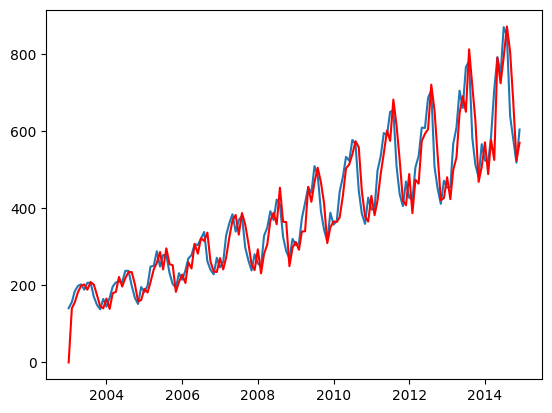

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(df, order = (2,1,2))
results_ARIMA = model.fit()
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.show()

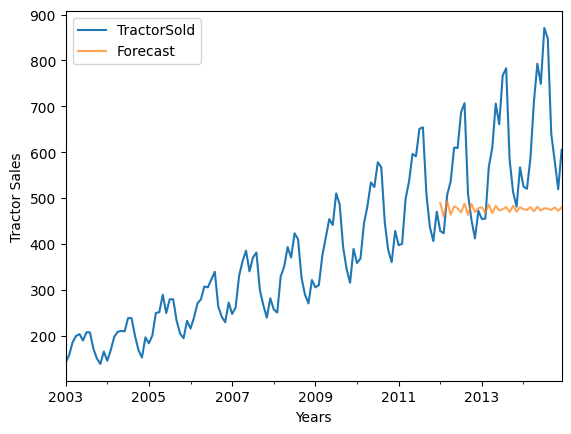

In [32]:
pred_arima = results_ARIMA.predict(start = pd.to_datetime('2012-01-01'), end = pd.to_datetime('2014-12-01'), dynamic = True)
axis = df.plot(label = 'Original')
pred_arima.plot(ax=axis, label = 'Forecast', alpha = 0.7)
axis.set_xlabel('Years');
axis.set_ylabel('Tractor Sales')
plt.legend()
plt.show()
plt.close()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


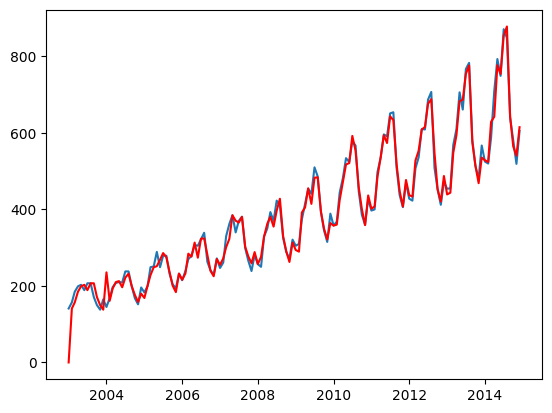

In [33]:
model = sm.tsa.statespace.SARIMAX(df, order = (2,1,2), seasonal_order = (2,1,2,12))
results_SARIMAX = model.fit()
plt.plot(df)
plt.plot(results_SARIMAX.fittedvalues, color = 'red')
plt.show()

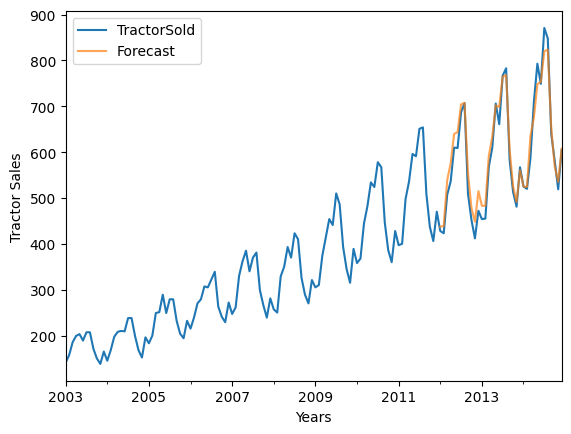

In [34]:
pred_sarimax = results_SARIMAX.predict(start = pd.to_datetime('2012-01-01'), end = pd.to_datetime('2014-12-01'), dynamic = True)
axis = df.plot(label = 'Original')
pred_sarimax.plot(ax=axis, label = 'Forecast', alpha = 0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend()
plt.show()
plt.close()

In [35]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from pmdarima import auto_arima
model = auto_arima(df, start_p = 1, start_q = 1,
                           max_p = 3, max_q = 3, m = 12,
                           start_P = 0, seasonal = True,
                           d = 1, D = 1, trace = True,
                           error_action='ignore',  
                           suppress_warnings = True,information_criterion = 'aic' ,
                           stepwise = True)
print("best aic: ",model.aic())
print("best order: ",model.order)
print("best seasonal order: ",model.seasonal_order)
# use adftest to find optimal 'd'
# maximum p and q
# frequency of series - m
# let model determine 'd'

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1126.461, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1133.413, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1124.270, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1124.489, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1123.180, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1124.536, Time=0.36 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1123.631, Time=0.87 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1125.170, Time=0.16 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1125.153, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1123.225, Time=0.14 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1119.806, Time=0.49 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1120.909, Time=1.05 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1121.150, Time=1.03 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(3,1,1)(0,1,0)[12]

In [37]:
order = model.order
seasonal_order = model.seasonal_order
model = sm.tsa.statespace.SARIMAX(df, order = (2,1,1), seasonal_order = (0,1,0,12), enforce_stationarity=True, enforce_invertibility=True)
results = model.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
pred = results.predict(start=pd.to_datetime('2012-01-01'), end = pd.to_datetime('2014-12-01'), dynamic = True)


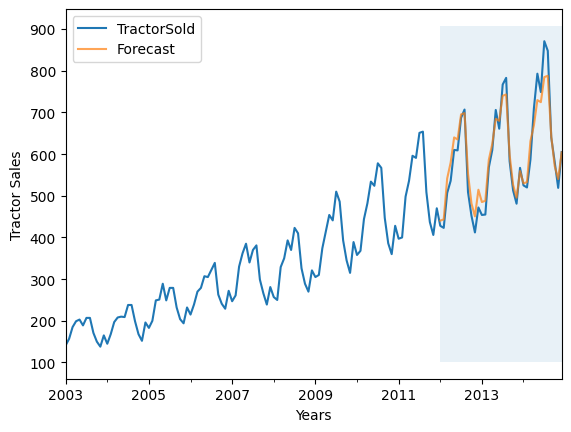

In [39]:
axis = df.plot(label = 'Original')
pred.plot(ax = axis, label='Forecast', alpha=0.7)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), df.index[-1], alpha = .1, zorder = -1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend()
plt.show()
plt.close()

# Forecasting using SARIMA

In [40]:
forecast = results.forecast(steps = 60)
forecasts = np.exp(forecast)

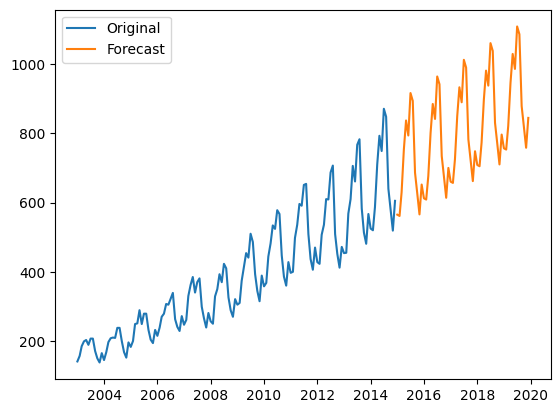

In [41]:
index = pd.date_range(df.index[-1], periods = 60, freq = 'MS')
plt.plot(df, label = 'Original')
plt.plot(forecast, label = 'Forecast')
plt.legend()
plt.show()

### Forecast on log data

In [42]:
forecast95 = results.get_forecast(steps=36,alpha=.7)
forecast_mean =forecast95.predicted_mean
forecast_ci = forecast95.conf_int()
forecast =forecast_ci.copy()
forecast['value'] = forecast_mean
forecast.head()

,lower TractorSold,upper TractorSold,value
2015-01-01,532.201779,597.973776,565.087777
2015-02-01,522.697358,599.977047,561.337202
2015-03-01,586.341813,672.649319,629.495566
2015-04-01,707.377081,799.491993,753.434537
2015-05-01,789.081272,885.367333,837.224303


### Forecast on real data

In [43]:
forecast95 = results.get_forecast(steps=26,alpha=.7)
forecast_mean = np.exp(forecast95.predicted_mean)
forecast_ci = np.exp(forecast95.conf_int())
forecast = forecast_ci.copy()
forecast['value'] = forecast_mean
forecast.head()


,lower TractorSold,upper TractorSold,value
2015-01-01,1.356113e+231,4.974061e+259,2.597188e+245
2015-02-01,1.010597e+227,3.687405e+260,6.104491e+243
2015-03-01,4.415844e+254,1.342418e+292,2.434729e+273
2015-04-01,1.621672e+307,inf,inf
2015-05-01,inf,inf,inf
